<a href="https://colab.research.google.com/github/andy-j-block/lymphoma_classifier/blob/master/get_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Data Import

In [4]:
from PIL import Image
import os
from os.path import abspath
import numpy as np
import pandas as pd
import random
import pickle

In [5]:
def running_hosted():

    if 'content' in os.getcwd():
        hosted = True
      
    else:
        hosted = False
        %autosave 120
    
    if hosted:
       print(f'This notebook is running hosted') 
    
    else:
        print(f'This notebook is running locally\nAutosave is set to 120 seconds')

    return hosted

############

def colab_setup():

    %cd -q /content/
    
    #check if git clone already performed
    if not os.path.isdir('./lymphoma_classifier'):
        !git clone https://github.com/andy-j-block/lymphoma_classifier.git
        
    %cd -q /content/lymphoma_classifier
    current_dir = os.getcwd()
    print(f"Current directory is '{current_dir}'")


############      

def load_images(imgs_main_dir):
    
    # get cancer type strings
    cancer_types = [type_ for type_ in os.listdir(imgs_main_dir)]

    # get directories where images are stored
    img_dirs = [os.path.join(imgs_main_dir, type_) for type_ in cancer_types]
    
    # read images into a list
    imgs = []

    for i, img_dir in enumerate(img_dirs):       
        img_paths = os.listdir(img_dir)
        
        for j in img_paths:

            # pass thru all the image files per image directory, read the image,
            # add it to the images list
            img_path = os.path.join(img_dirs[i], j)
            img_array = Image.open(img_path)
            img_array = np.asarray(img_array)        
            imgs.append((cancer_types[i], img_array, img_path))
                
    return imgs

###Local or hosted runtime

I like to use Google Colab for its hosted runtime features so I include a check to see if the notebook is being run locally or hosted.

In [8]:
hosted = running_hosted()

This notebook is running hosted


In [9]:
if hosted:
    colab_setup()

Current directory is '/content/lymphoma_classifier'


Fetching the latest version of albumentations library if running on hosted machine

In [5]:
if hosted:
    !pip install albumentations --upgrade

     |████████████████████████████████| 81kB 5.9MB/s 
     |████████████████████████████████| 37.6MB 81kB/s 
     |████████████████████████████████| 952kB 59.2MB/s 
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


###Data import and image preview

Import the images and store them in a data structure

In [11]:
imgs = load_images('./Images')

First entry image path: ./Images/FL/sj-05-5389-R1_008.tif
First entry cancer type: FL
First entry RGB array: [[[ 63  37  73]
  [ 56  37  73]
  [ 51  30  67]
  ...
  [113  83 112]
  [125  96 117]
  [142 106 124]]

 [[ 65  37  71]
  [ 60  37  72]
  [ 54  30  66]
  ...
  [113  83 114]
  [125  96 120]
  [135 106 124]]

 [[ 67  39  71]
  [ 67  39  71]
  [ 67  37  72]
  ...
  [115  84 120]
  [127  94 124]
  [138 105 128]]

 ...

 [[125  82 119]
  [111  82 119]
  [107  83 115]
  ...
  [ 35  19  45]
  [ 37  21  48]
  [ 37  23  52]]

 [[ 83  48  88]
  [ 75  48  88]
  [ 77  51  87]
  ...
  [ 36  19  43]
  [ 37  20  47]
  [ 37  21  48]]

 [[ 69  37  76]
  [ 63  37  76]
  [ 59  36  73]
  ...
  [ 36  22  44]
  [ 39  20  46]
  [ 36  22  50]]]
First entry image:


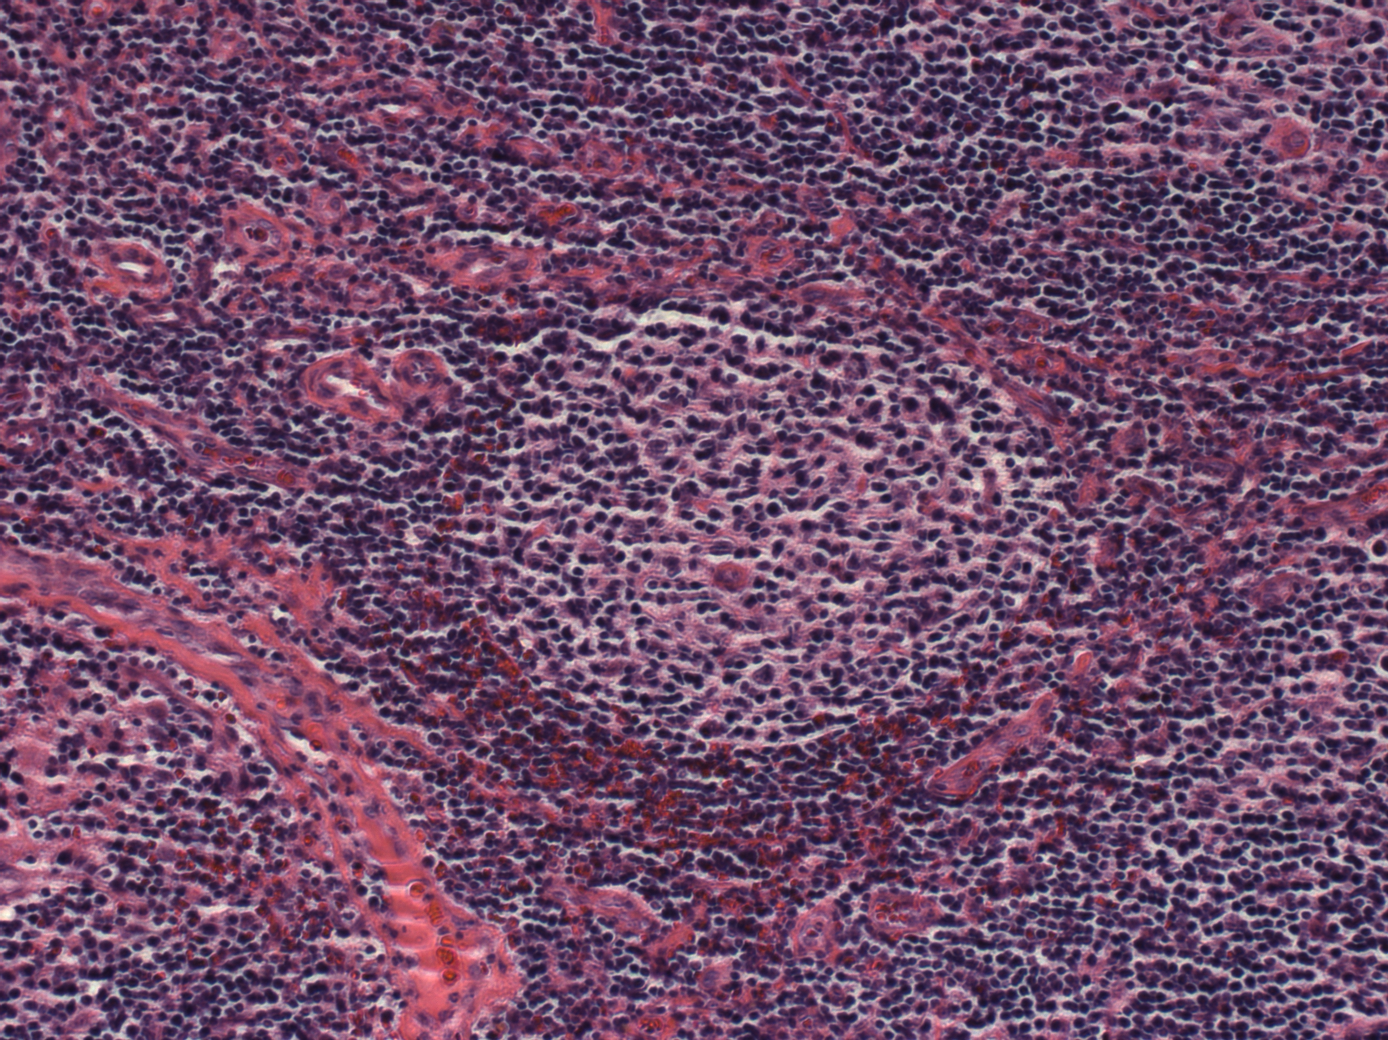

In [14]:
print(f'First entry image path: {imgs[0][2]}')
print(f'First entry cancer type: {imgs[0][0]}')
print(f'First entry RGB array: {imgs[0][1]}')
print('First entry image:')
Image.fromarray(imgs[0][1])

###Create DataFrame

In [16]:
df = pd.DataFrame(imgs, columns=['cancer_type', 'img_array', 'img_path'])
df.head(3)

,cancer_type,img_array,img_path
0,FL,"[[[63, 37, 73], [56, 37, 73], [51, 30, 67], [5...",./Images/FL/sj-05-5389-R1_008.tif
1,FL,"[[[174, 153, 166], [172, 153, 166], [172, 153,...",./Images/FL/sj-05-5389-R1_002.tif
2,FL,"[[[160, 119, 130], [164, 119, 127], [172, 121,...",./Images/FL/sj-05-588-R1_001.tif


### Pickle the dataframe

In [17]:
if not os.path.exists('./dataframe.pkl'):
    df.to_pickle('./dataframe.pkl')